# Exercise 14 - Structured Data in Python ([`pandas`](https://pandas.pydata.org/))

You should now know how to open files, read data tables from them using numpy, and write your outputs to new files.  Getting data in/out of Python is a routine task for data analysis, and people have put a lot of effort into making it as simple as possible. [`pandas`](https://pandas.pydata.org/) is one of the main data science modules, which specialises in handling 'spreadsheet'-type data - i.e. a data table with column and/or row labels.

In this practical you'll learn the basics of reading and writing data using `pandas`, some basic data manipulation and plotting.

In addition to this practical, `pandas` has a [number of excellent tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) focussed at beginners. There is also a chapter about `pandas` in the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html). If your work is based around spreadsheet-type data, we strongly recommend going through these tutorials in due course.

## `pandas` basics

The central concept of `pandas` is the `DataFrame`. This is a 2D table of data, with associated row and column labels - just like a spreadsheet. A `DataFrame` can be 'indexed' by row or column names - i.e. you use the row/column *labels*, instead of their numeric indices like you do in `numpy` arrays.

`pandas` started as a convenient way to import and export labeled data, but has grown into something a lot more comprehensive, and now does basic statistics, plotting, time-series analysis, 'split-apply-combine' data grouping... and much more.

You import pandas just like any other module; conventionally, we use
```python
import pandas as pd
```

To create a `DataFrame`, you need some 2D data, which you give to `pandas`:

```python
df = pd.DataFrame(data)
```

**&#10148; Generate a numpy array of random data with 3 rows and 4 columns, and make a `DataFrame`.**

In [3]:
# Try it here!

import pandas as pd
import numpy as np
data = np.random.randint(0, 1000, (3, 4))
df = pd.DataFrame(data)
df

,0,1,2,3
0,744,464,264,8
1,425,689,965,858
2,998,396,909,873


When you look at the `DataFrame`, it should look like a nice table in the Jupyter notbook, with numbered rows and columns. These numbers are the same as the `numpy` indices that you could use to access these rows/column.

You can access these data by these indices, just like you would in `numpy`. However, because `DataFrames` are quite a lot more complex than `numpy` arrays, you can't index them directly -  you have to use `.loc[]`.

**&#10148; Use the `.loc[]` method to index your `DataFrame`. Compare it to `numpy` indexing.**

In [4]:
# Try it here!

df.loc[2]

# first number is row, second number is column - just like numpy!

0    998
1    396
2    909
3    873
Name: 2, dtype: int64

So far, everything we've done can be achieved with equivalent convenience in `numpy`... so what's the point? The strength of `pandas` is in its use of data labels, so you can associate rows/columns with meaningful information, rather than numerical indices.

This can be really useful if, for example, you're working with a dataset that you add new columns to over time. If you were using numpy, the numeric indices of the columns of interest might change, and break your code. With `pandas`, your code will be fine as long as the labels of the columns stays the same.

Let's assign some labels to your dataset. You can do this by setting the `columns` or `index` (rows) attributes of your dataframe with a list of strings whose length is equal to the number of columns or rows. For example,

```python
df = pd.DataFrame(...)
df.columns=['Label_1', 'Label_2',...,'Label_N']
df.index = ['Row_1','Row_2',...,'Row_M']
```

#### What should labels be?

You can call columns/rows whatever you like. A column name could be a whole paragraph, if you really wanted... but this is a really bad idea. You should use labels that are **unique**, **meaningful** and **concise**. 

For example, `Temperature` isn't great - what are the units? What if you have Kelvin, Centigrade *and* Fahrenheit columns? `Temperature °C` is better, but will be cumbersome in routine use, because it's long, and has special characters and spaces in. `T_C` is ideal - it's nice and short, containing a commonly used abbreviation for temperature ('T'), and the unit.

**Bonus:** If your label names start with a letter and don't contain spaces or special characters, you can access them directly using the `.` operator, without needing to use `.loc[]`. For example:
```python
df.Label_1
df.loc[:, 'Label_1']
```
both produce return the same column, but `df.Label_1` brings the added benefit of having <kbd>Tab</kbd> auto-completion for your column names! This can be really convenient if, for example, you want to access columns during plotting.

**&#10148; Label the columns of your dataframe as [A, B, C, D], and your rows [X, Y, Z]:**

In [5]:
# Try it here!

df.columns = ['A', 'B', 'C', 'D']
df.index = ['X', 'Y', 'Z']
df

,A,B,C,D
X,744,464,264,8
Y,425,689,965,858
Z,998,396,909,873


When you look at your dataframe again, you should see that it now displays the column/row names that you gave it.

**&#10148; Access column 'B' of your data:**

**Hint:** If you want to select a particular column, you'll have to use the `:` operator to specify 'all row values', just like in `numpy`.

In [6]:
# Try it here!

df.loc[:, 'A']

X    744
Y    425
Z    998
Name: A, dtype: int64

You may also notice here that numeric indices no longer work with the `.loc[]` operator. You *can* still use numeric indices if you *really* want to using `.iloc[]`... although if you're doing this all the time you'd be better off using `numpy` instead of pandas.

Just like `numpy` arrays, `DataFrames` also contain a number of useful properties, such as `.size` and `.shape`, which tell you useful information about the data.

**&#10148; Try it here:**


In [7]:
# Try it here!

df.shape

(3, 4)

### Read & Write Data

Pandas has a number of functions for reading and writing data in a [wide range of formats](https://pandas.pydata.org/pandas-docs/stable/io.html). 

Data reading functions are available within the pandas module in the form `pd.read_FORMAT()`, and return a `DataFrame`. Writing functions are available as a method directly accessible from the `DataFrame`, and are in the form `dataframe.to_FORMAT()`. In both these cases, replace `FORMAT` with the desired data format (e.g. 'excel' or 'csv'). Both of these functions take a file path and a number of other arguments that modify their behaviour.

**&#10148; Load the file 'boston.csv' into a `DataFrame`, find out how large the dataset is, and look at the top 5 rows.**

**Hint 1:** Take a look at the file in a text editor first, and then use pandas' `read_csv` function. You'll probably want to use the `comment` parameter to tell pandas that lines beginning with `#` are comments and should be ignored!

**Hint 2:** Try the `.shape` attribute.

**Hint 3:** Use the `.head()` method to see the top N lines (and `.tail()` to see the bottom N!)

In [8]:
# Try it here!

boston = pd.read_csv('boston.csv', comment='#')
boston.shape
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**&#10148; Save the Boston `DataFrame` as an html table**

In [155]:
boston.to_html('boston.html')

Take a look at the resulting files, to make sure they look right. Have a play around with parameters (e.g. `index=False` to remove the row numbers).

### Microsoft Excel
Is irritatingly common in science. Irritating, because it saves data in a proprietary binary format which can't be easily read without having a copy of Microsoft Excel (or sometimes, the right *version* of Microsoft Excel!). There are ways of importing Excel files into Python, but most are quite complex. `pandas` offers a very easy solution to this problem.

**&#10148; Load the file `iris.xlsx` into a `DataFrame`, with `species` as the index (row) labels**

**Hint 1:** the data are in a sheet called 'iris_data'.

**Hint 2:** Everything is installed on the RSES Jupyter server, but you will need to install the package `xlrd` to read Excel spreedsheets with Pandas on your computer. 

In [160]:
iris = pd.read_excel('iris.xlsx', sheet_name='iris_data', index_col=0)

In [162]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2


**&#10148; Save the iris `DataFrame` as a csv**

In [163]:
iris.to_csv('iris.csv')

**&#10148; Save the iris `DataFrame` as a $\LaTeX$ table**

This can be *really* useful if you do your work in $\LaTeX$, as you might for a MSc or PhD thesis!

In [166]:
iris.to_latex('iris.tex')

### Reading from the Web(!)

`pandas` can also read data directly from the web, which is useful if you're using a central database which is regularly updated.

For example, the famous [Mauna Load Atmospheric CO2 Dataset](https://www.esrl.noaa.gov/gmd/ccgg/trends/full.html), which is updated monthly.

The URL for the monthly dataset is: ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt

**&#10148; Look at this dataset in your browser, and read it into a `pandas.DataFrame` using the `pd.read_table` function.**

**Hint 1:** you'll need to specify the delimiter between the data columns using the `delimiter` argument.

**Hint 2:** because of data formatting choices, there's no simple way to get the column headings from this dataset, and you'll have to assign them manually.

In [11]:
co2 = pd.read_table('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', comment='#', delimiter='\s+', header=None)

co2.columns = ['year', 'month', 'decimal_year', 'co2_average', 'co2_interpolated', 'co2_trend', 'n_days']

In [12]:
co2.head()

,year,month,decimal_year,co2_average,co2_interpolated,co2_trend,n_days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


## Plotting & Data Cleaning

Let's have a look at this CO2 record. Combine what you learned about indexing DataFrames and plotting to make a line graph of time (decimal year) vs. average CO2.

**&#10148; Make a plot!** You can simply pass the dataframe columns to `plt.plot()` as if they were Numpy arrays.

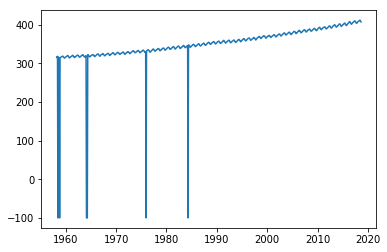

In [13]:
# Try it here!
import matplotlib.pyplot as plt
plt.plot(co2.decimal_year, co2.co2_average)

This looks mad! There are several points where average CO2 is less than zero... what's going on?

You'll see from the header of the Mauna Load CO2 record that values that are equal the -99.99 represent 'missing data'. We therefore want to exclude this data from further analyses.

**&#10148; Do this by using the `.replace()` method to substitute `np.nan` for `-99.99`, then re-draw the plot**

**Hint:** you want to replace these values in the original dataset, rather than return a copy of the data with these values replaced. Think about what the `inplace` argument does in this function.


In [14]:
co2.replace(to_replace=-99.99, value=np.nan, inplace=True)

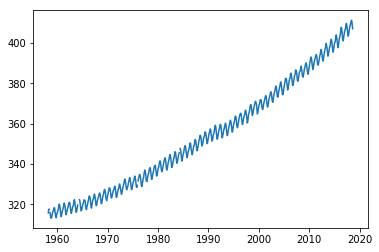

In [15]:
plt.plot(co2.decimal_year, co2.co2_average)

Much better! Let's keep a copy of this data for future offline use.


**&#10148; Save the co2 data as a csv file.**

You'll notice this data has an overall trend, and a period oscillation around the trend. This oscillation is caused by seasonal changes in the balance between respiration and photosynthesis - CO2 drops in the summer, when plants in the Northern hemisphere are photosynthesising more.

Let's try to isolate the overall trend by working out a yearly, instead of monthly trend.

We can do this using the 'split-apply-combine' methodology. We 'split' the data according to the value of a particular field, 'apply' a function to each subset, and the 'combine' all the results back together.

In `pandas` we do this using the `.groupby()` function to specify that all records with the same entry for a particular field should be treated as a group, followed by `aggregate` (or `apply`, for more complex operations) to specify how each group should be reduced into a single number.

**&#10148; Calculate and plot the annual mean CO2 for the Mauna Loa record**

In [16]:
co2_annual = co2.groupby('year').aggregate('mean')

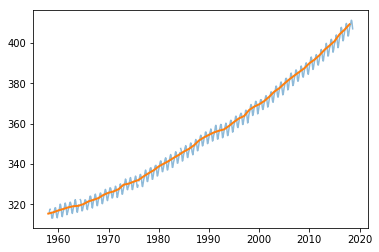

In [247]:
plt.plot(co2.decimal_year, co2.co2_average, alpha=0.5)
plt.plot(co2_annual.index, co2_annual.co2_average, lw=2)

## Subsets

Often, you might want to create a subset of a dataset. For example, you might wish to isolate only the `year` and `co2_average` information from the yearly mean.

You can do this by indexing the dataset, and assigning it to a new name.

**&#10148; Create a subset of the annual mean data containing only the `co2_average` column**

In [22]:
co2_ann = co2_annual.loc[:, 'co2_average']


## reset_index()

In this subset you'll notice that you only have one column, but the 'year' information is preserved in the `index` of the data. You can turn the index back into a data column using `.reset_index()`.

**&#10148; Try it here!**

In [249]:
co2_ann = co2_ann.reset_index()

## Merge Dataframes

Let's try to look at the seasonal oscillation in more detail. To do this, we need to subtract the annual mean. However, at the moment our annual mean and our seasonal data are in two different `DataFrames` of different sizes.

`pandas` has a number of functions for combining and merging `DataFrames` in different ways. Let's have a go at using `pd.merge()` to combine the annual mean dataset with the original data.

**&#10148; Try it here!** You will need to look at the help for `pd.merge()` to work out how to do this.

In [250]:
co2_comb = pd.merge(co2, co2_ann, on='year', suffixes=('', '_ann'))

## Operations and New Columns

Now we've combined them, we need to subtract the annual mean from the monthly signal to isolate the seasonal trend.

**&#10148; Create a new column containing the seasonal signal**

**Hint:** If you try to assign something to an index that doesn't exist, `pandas` creates a new column.

In [251]:
co2_comb.loc[:, 'seasonal'] = co2_comb.loc[:, 'co2_average'] - co2_comb.loc[:, 'co2_average_ann']

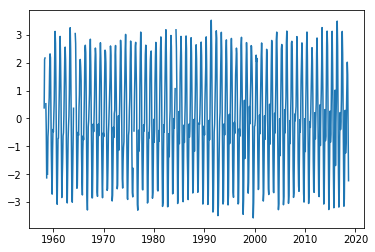

In [254]:
plt.plot(co2_comb.decimal_year, co2_comb.seasonal)

## Selecting Data

Remember indexing from above? You can use a similar approach in `pandas` to select data in a number of ways. For example, we can use 'logical indexing' to select data only from the last 10 years.

To do this, we use logical operators (`>`, `<`, `==`) to create a `boolean` array the same size as a dimension of our array. For example:

```python
ind = co2.loc[:, 'year'] >= 2008
```

In this example, `ind` will be `True` wherever year is greater than or equal to 2008.

We can then apply this to select a subset of our `DataFrame`:

```python
last_ten = co2.loc[ind, :]
```

**&#10148; Create a subset containing the years between 1980-1990, and plot the seasonal trend.**


In [256]:
decade = co2_comb.loc[(co2_comb.year >= 1980) & (co2_comb.year <= 1990)]

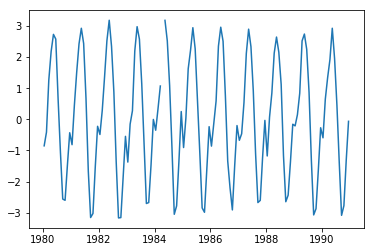

In [257]:
plt.plot(decade.decimal_year, decade.seasonal)